# Data Visualisation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

In [3]:
variables = ["top-25", "field", "timeframe", "stat_twin"]
criteria = ["adherence", "consistency", "factuality"]
ids = ["lisette", "chiara", "Daniele"]

In [4]:
dataframes = {}

for criterion in criteria: 
    if criterion == "adherence": 
        for variable in variables: 
            dataframes[f"{criterion}_{variable}"] = pd.DataFrame(columns = ["answer_1", "answer_2", "answer_3", "answer_4"])
            for id in ids:
                file_name = f"{id}_{criterion}_{variable}.csv"
                df = pd.read_csv(f"{id}/"+ file_name)
                dataframes[f"{criterion}_{variable}"].loc[f"{id}"] = np.array([ast.literal_eval(x)[1] for x in df['Adherence']])

    if criterion == "consistency":
        for variable in variables: 
            dataframes[f"{criterion}_{variable}"] = pd.DataFrame(columns = ["Formal_Consistency", "Names_Consistency"])
            for id in ids:
                file_name = f"{id}_{criterion}_{variable}.csv"
                df = pd.read_csv(f"{id}/"+ file_name)
                dataframes[f"{criterion}_{variable}"].loc[f"{id}"] = np.array(df)[0] 

    if criterion == "factuality":
        for variable in variables: 
            dataframes[f"{criterion}_{variable}"] = pd.DataFrame(columns = ["answer_1", "answer_2", "answer_3", "answer_4"])
            for id in ids:
                file_name = f"{id}_{criterion}_{variable}.csv"
                df = pd.read_csv(f"{id}/"+ file_name)
                dataframes[f"{criterion}_{variable}"].loc[f"{id}"] =  np.array([ast.literal_eval(x)[1] if ast.literal_eval(x)[1] != 'No names found' else 0 for x in df['Factuality']])



In [5]:
dataframes["adherence_top-25"]

,answer_1,answer_2,answer_3,answer_4
lisette,6,6,1,4
chiara,5,6,1,5
Daniele,8,8,1,7


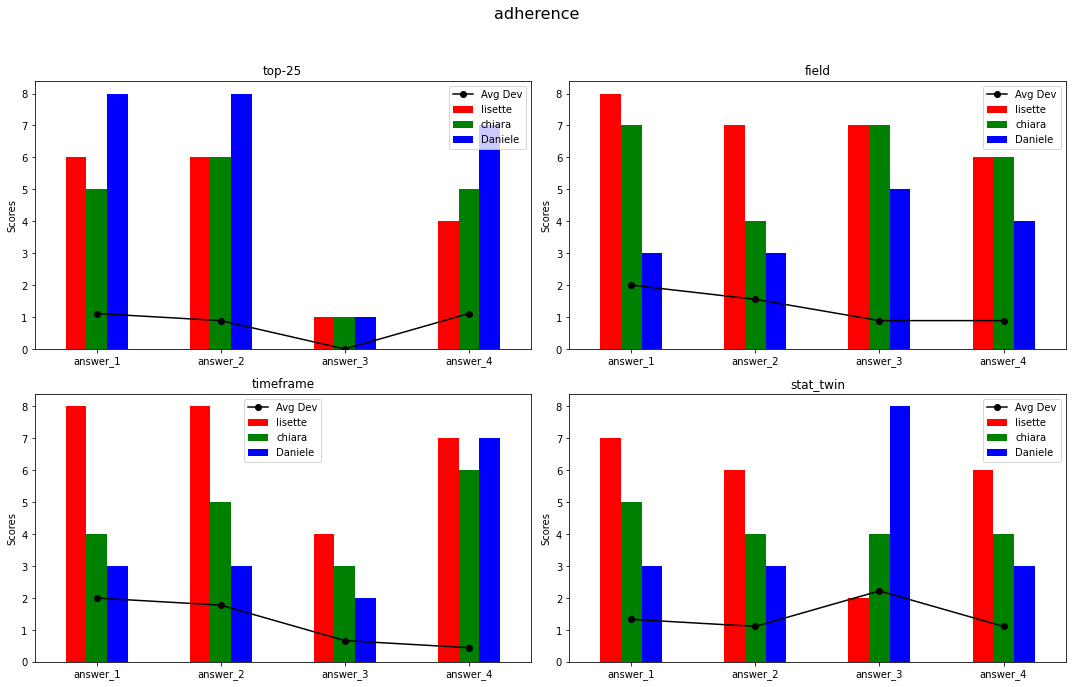

In [9]:
def plot_scores(criterion, variables): 

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

    axes = axes.flatten()

    for ax, data, title in zip(axes, [dataframes[f"{criterion}_{ variable}"] for variable in variables], variables):
        
        # Add the average deviation for each answer
        mean_scores = data.mean(axis=0)
        deviations = data.sub(mean_scores, axis=1).abs()
        average_deviations = deviations.mean(axis=0)

        data.T.plot(kind='bar', ax=ax, color=['red', 'green', 'blue'])
        average_deviations.plot(kind='line', color='black', marker='o', ax=ax, label='Avg Dev')

        ax.set_xticklabels(labels = data.columns, rotation=0)
        ax.set_ylabel('Scores')
        ax.set_title(title)
        ax.legend()

    fig.suptitle(f"{criterion}", fontsize=16)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

plot_scores("adherence", variables)

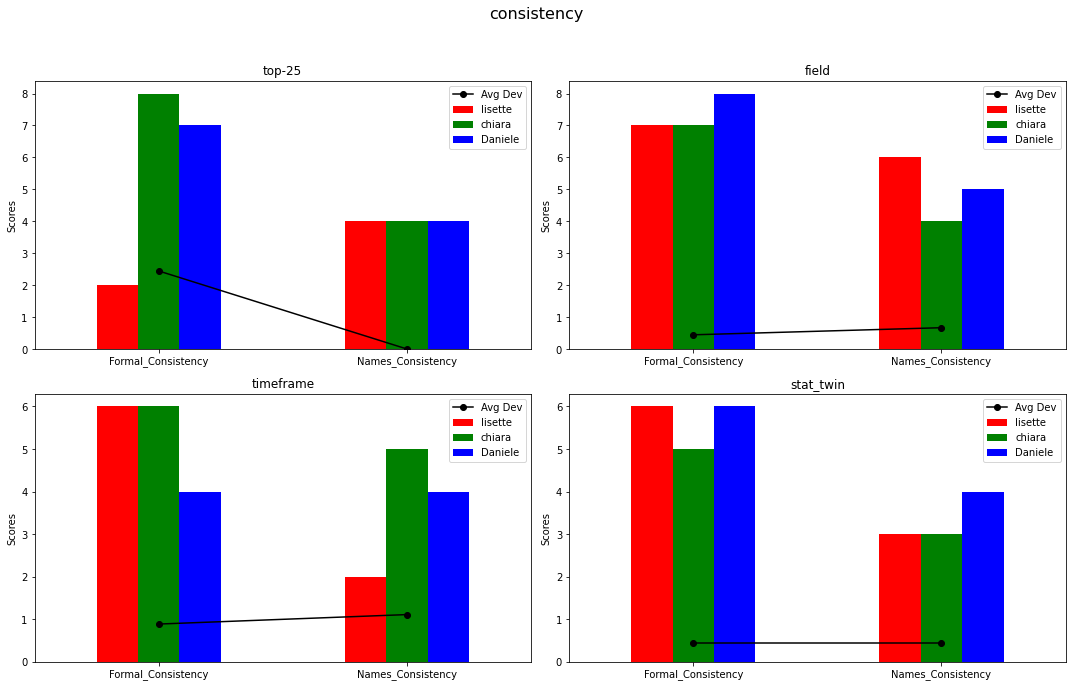

In [10]:
plot_scores("consistency", variables)

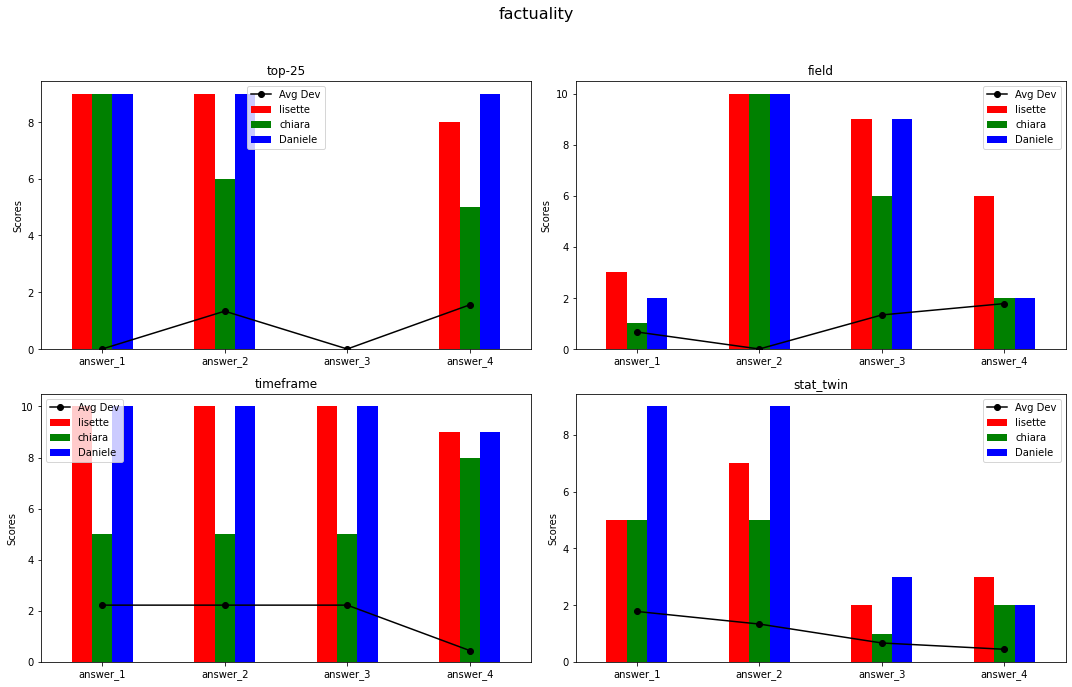

In [11]:
plot_scores("factuality", variables)

In [ ]:
flexibility_df = pd.DataFrame(columns=["Flexibility"])
for id in ids: 
    file_name = f"{id}_flexibility_evaluation.csv"
    df = pd.read_csv(f"{id}/"+ file_name)
    flexibility_df.loc[f"{id}"] = int(df.iat[0, 0])

flexibility_df

,Flexibility
lisette,7
chiara,5
Daniele,6


# Conclusions

- Overall, the three assessors were satisfied witht the 4 criteria. 

- Upon reviewing the results, the three assessors gained a better understanding of the following criteria:

- - ADHERENCE: Each prompt comes with specific 'minimum requirements' (e.g., the exact number of people requested, or the year of publication). Fulfilling these minimum requirements is sufficient to achieve the maximum score in adherence. If the outcome exceeds the 'minimum requirement', the score will only be penalized if the additional information is irrelevant or detrimental to the overall quality of the response.

- - CONSISTENCY: To achieve the highest score for formal consistency, it is not sufficient to maintain the same structure throughout the answers. It is also essential to ensure uniformity in the keys of a dictionary and to avoid providing additional text, either as an introduction or as a conclusion. This enhances the ease of processing the answers.

- - FACTUALITY: The assessors highlighted the critical role of human oversight in checking for inaccuracies and noted the complexity of automating this criterion. They also recognized the need to generalize the evaluation framework to include two specific facets of hallucinations, as detailed by Huang et al. (2023): Factual Inconsistency and Factual Fabrication. 
- - - Factual Inconsistency refers to LLM outputs that, while grounded in real-world information, present contradictions. For instance, if the 'epoch' variable specifies the 1990s, and the LLM names a scientist who did not publish during that period or in the requested field. 
- - - Factual Fabrication involves LLM outputs that create facts completely unverifiable against established real-world knowledge, such as inventing names. The highest scores are awarded when all names mentioned are verified within the dataset, with scores decreasing as fewer names are found.

- - FLEXIBILITY: No specific remarks were made, as there was good agreement on this score.